
# Table of Contents


$\;\;\;$ 1. [Data Selection](#data_selection)<br>
$\;\;\;\;\;\;$ 1.1. [Import libraries](#libraries)<br>
$\;\;\;\;\;\;$ 1.2. [Load data](#load_data)<br>
$\;\;\;$ 2. [Data Processing](#data_processing)<br>
$\;\;\;\;\;\;$ 2.1. [Casting types of variables](#casting)<br>
$\;\;\;\;\;\;$ 2.2. [Check missing values](#missing)<br>
$\;\;\;\;\;\;$ 2.3. [Correlations](#correlations)<br>
$\;\;\;\;\;\;$ 2.4. [Exploratory data analysis and outlier detection](#eda)<br>
$\;\;\;$ 3. [Data transformation](#data_transformation)<br>
$\;\;\;\;\;\;$ 3.1. [Encoding](#encoding)<br>
$\;\;\;\;\;\;$ 3.2. [Normalization](#normalization)<br>
$\;\;\;\;\;\;$ 3.3. [Correlations](#correl)<br>
$\;\;\;\;\;\;$ 3.4. [Logaritmic transformation](#logaritmic)<br>
$\;\;\;\;\;\;$ 3.5. [Additional transformations](#additional)<br>
$\;\;\;$ 4. [Data Mining](#modelling)<br>
$\;\;\;\;\;\;$ 4.1. [Lasso regression model](#lasso)<br>
$\;\;\;\;\;\;$ 4.2. [Ridge regression model](#ridge)<br>
$\;\;\;\;\;\;$ 4.3. [Extreme Gradient Boosting model](#xgb)<br>
$\;\;\;\;\;\;$ 4.4. [Gaussian Processes model](#gauss)<br>
$\;\;\;\;\;\;$ 4.5. [Suppor Vector Machine Regression model](#svm)<br>
$\;\;\;$ 5. [Conclusions](#conclusions)<br>




# 1. Data Selection

<a id='data_selection'></a>

## 1.1. Import libraries

<a id='libraries'></a>

En primer lugar debemos importar las librerias que usaremos a lo largo del trabajo:

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(Hmisc)
library(corrplot)
library(caret)
library(recipes)
options(repr.plot.width=8, repr.plot.height=5)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

corrplot 0.84 loaded

Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster


Attaching package: ‘recipes’

The following object is masked from ‘package:stats’:

    step



## 1.2. Load data

<a id='load_data'></a>

Una vez importadas, tendremos que cargar los datasets con los que vamos a trabajar. En este caso son dos, el que usaremos como conjunto de entrenamiento y validación(llamado df), y el que deberemos enviar a Kaggle con nuestros resultados(llamado submit)

In [2]:
#load datasets
df <- read.csv("./house-prices/input_data/train.csv")
submit <- read.csv("./house-prices/input_data/test.csv")

Como vemos los dataset son similares, la única diferencia a simple vista es que el dataset que deberemos enviar a Kaggle contiene una columna menos, precisamente la que será nuestra variable objetivo, "SalePrice".

In [3]:
head(df)

head(submit)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2010,WD,Normal


Mas adelante, para enviar nuestras predicciones a Kaggle, necesitaremos tener almacenada la variabla Id. Es por ello, que la guardaremos en una variable, y la eliminaremos tanto del conjunto df como del submit.

In [4]:
submit_labels <- submit$Id
df$Id <- NULL
submit$Id <- NULL

# 2. Data Processing

<a id='data_processing'></a>

## 2.1. Casting types of variables

<a id='casting'></a>

Uno de los analisis que debe hacerse en problemas de data science es verificar el tipo de dato que ha adquirido cada variable al cargarse. Para ello recurriremos a la funcion str() de R, y tras una inspección, podemos comprobar que todas las variables han sido denominadas con la tipología adecuada.

In [5]:
str(df)

'data.frame':	1460 obs. of  80 variables:
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   :

## 2.2. Check missing values

<a id='missing'></a>

De las 80 columnas que contiene ahora mismo el dataset, algunas de ellas poseen values missing. Veamos que porcentaje de registros son NA en cada columna:

In [6]:
missing <- sapply(df, function(x) sum(is.na(x)))
missing <- sort(missing[missing > 0], decreasing = F)
cat("NA values for df dataset")
missing

NA values for df dataset

Electrical   MasVnrType   MasVnrArea     BsmtQual     BsmtCond BsmtFinType1 
           1            8            8           37           37           37 
BsmtExposure BsmtFinType2   GarageType  GarageYrBlt GarageFinish   GarageQual 
          38           38           81           81           81           81 
  GarageCond  LotFrontage  FireplaceQu        Fence        Alley  MiscFeature 
          81          259          690         1179         1369         1406 
      PoolQC 
        1453

En un primer momento se pensó en separar las variables cualitativas de las cuantitativas. Con ellas separadas, a las cualitativas se les aplicaría que, para cada fila que tuviera un valor NA, lo sustituiriamos por la clase mayoritaria. Para las cuantitativas, se sustituiria por la media. 
Finalmente este planteamiento tan general no parece que fuese el mejor, ya que muchos de los valores NA estaban ahí porque no aplicaban, o la media no era el mejor estadistico, etc. La decisión final ha sido, para las variables categóricas cuyos valores NA son menores al 15%, podemos estudiar cual es la frecuencia de cada una de las clases, encontrando así la clase mayoritaria. En caso de que dicha frecuencia sea considerablemente mayor que la segunda clase mas frecuente, se la asignaremos a los valores "None". 

In [7]:
#function to create new level in factor columns
without <- function(data,var){
                            levels(data[,var]) <- c(levels(data[,var]), "None")
                            data[,var][is.na(data[,var])] <- "None"
                            return(data[,var])
            }

Parece lógico que debemos hacer la imputación de valores, no solo sobre el conjunto de entrenamiento, si no también sobre el cojunto submit. Es por esto que vamos a combinar ambos datasets en uno y a aplicar el mismo razonamiento a ambos.

In [8]:
#columns to add none value
none_cols <- c("MasVnrType","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType",
               "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "Alley", "MiscFeature")



In [9]:
#Adding SalePrice empty into submit dataset to concat with train data
submit$SalePrice <- NA
data_raw <- rbind(df,submit)
data_combined <- data_raw

In [10]:
#Applying the above function to replace NA values

for (i in 1:length(none_cols)){
    data_combined[,none_cols[i]] <- without(data_raw, none_cols[i])
}


data_combined$Electrical <- data_combined$Electrical %>% replace_na("SBrkr")
data_combined$MasVnrArea[is.na(data_combined$MasVnrArea)] <- median(data_combined$MasVnrArea, na.rm=TRUE)
data_combined$GarageYrBlt[is.na(data_combined$GarageYrBlt)] <- median(data_combined$GarageYrBlt, na.rm=TRUE)
data_combined$LotFrontage[is.na(data_combined$LotFrontage)] <- median(data_combined$LotFrontage, na.rm=TRUE)

In [11]:
head(data_combined)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
50,RL,85,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [12]:
df = subset(data_combined,!is.na(SalePrice))
submit = subset(data_combined,is.na(SalePrice))

Una vez ejecutado este procedimiento hemos conseguido varias cosas: por un lado el conjundo "df" ya no contiene ninguna valor nulo. Además de esto, el conjunto "submit" cuyas columnas coincidieran con las que en "df" había algun NA, tambien han sido solventadas. ¿Que queda ahora por hacer? Ver que columnas del conjunto "submit" tienen valores NA, estudiar si debe seguirse el mismo procedimiento o no, y proceder a hacer la imputación de los nuevos valores.

In [13]:
missing <- sapply(submit, function(x) sum(is.na(x)))
missing <- sort(missing[missing > 0], decreasing = F)
cat("NA values for submit dataset")
missing

NA values for submit dataset

Exterior1st  Exterior2nd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF 
           1            1            1            1            1            1 
 KitchenQual   GarageCars   GarageArea     SaleType    Utilities BsmtFullBath 
           1            1            1            1            2            2 
BsmtHalfBath   Functional     MSZoning    SalePrice 
           2            2            4         1459

Para imputarlas, se ha considerado que la mejor opción era sustituir los Na por el valor mas frecuente de la variable. Al fin y al cabo, hemos visto que el mayor error que podremos cometer es 4 para la columna MSZoning, que es el numero de registros que faltan. Por tanto, para estos pocos registros que hay que modificar, parece razonable esta práctica. 
Para defender esta postura, vemos por ejemplo la columna "SaleType":


  Con ConLw ConLI   Oth   CWD ConLD   COD   New    WD 
    3     3     4     4     8    17    44   117  1258 

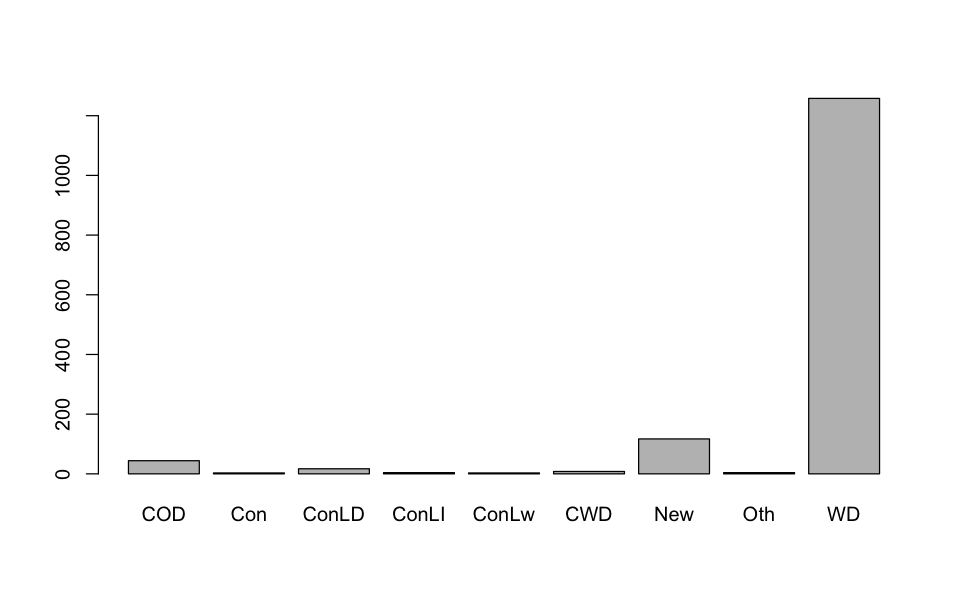

In [14]:
sort(table(submit$SaleType))
barplot(table(submit$SaleType))

Como vemos, la clase WD es muy predminante frende al resto. En otros casos esta predominancia no es tan fuerte, pero como se ha dicho, podemos asusmir ese error al tratarse de tan pocos registros.

In [15]:
mode <- function(x) {
                    ux <- unique(x)
                    ux[which.max(tabulate(match(x, ux)))]
        }

In [16]:
submit$BsmtFinSF1 <- submit$BsmtFinSF1 %>% replace_na(mode(submit$BsmtFinSF1))
submit$Exterior1st <- submit$Exterior1st %>% replace_na(mode(submit$Exterior1st))
submit$Exterior2nd <- submit$Exterior2nd %>% replace_na(mode(submit$Exterior2nd))
submit$BsmtFinSF2 <- submit$BsmtFinSF2 %>% replace_na(mode(submit$BsmtFinSF2))
submit$BsmtUnfSF <- submit$BsmtUnfSF %>% replace_na(mode(submit$BsmtUnfSF))
submit$TotalBsmtSF <- submit$TotalBsmtSF %>% replace_na(mode(submit$TotalBsmtSF))
submit$KitchenQual <- submit$KitchenQual %>% replace_na(mode(submit$KitchenQual))
submit$GarageCars <- submit$GarageCars %>% replace_na(mode(submit$GarageCars))
submit$GarageArea <- submit$GarageArea %>% replace_na(mode(submit$GarageArea))
submit$SaleType <- submit$SaleType %>% replace_na(mode(submit$SaleType))
submit$Utilities <- submit$Utilities %>% replace_na(mode(submit$Utilities))
submit$BsmtFullBath <- submit$BsmtFullBath %>% replace_na(mode(submit$BsmtFullBath))
submit$BsmtHalfBath <- submit$BsmtHalfBath %>% replace_na(mode(submit$BsmtHalfBath))
submit$Functional <- submit$Functional %>% replace_na(mode(submit$Functional))
submit$MSZoning <- submit$MSZoning %>% replace_na(mode(submit$MSZoning))

In [17]:
sort(table(submit$SaleType))


  Con ConLw ConLI   Oth   CWD ConLD   COD   New    WD 
    3     3     4     4     8    17    44   117  1259 

In [18]:
missing <- sapply(submit, function(x) sum(is.na(x)))
missing <- sort(missing[missing > 0], decreasing = F)
cat("NA values for submit dataset")
missing

NA values for submit dataset

SalePrice 
     1459

Listo! Ya únicamente tenemos valores faltantes en la columna correspondiente a nuestra variable objetivo.

## 2.3. Correlations

<a id='correlations'></a>

Para estudiar la correlación que existe entre las variables, tanto las predictoras entre si como con la variable objetivo, vamos a realizar una matriz de correlación y la representaremos gráficamente.

There are 37 numeric variables

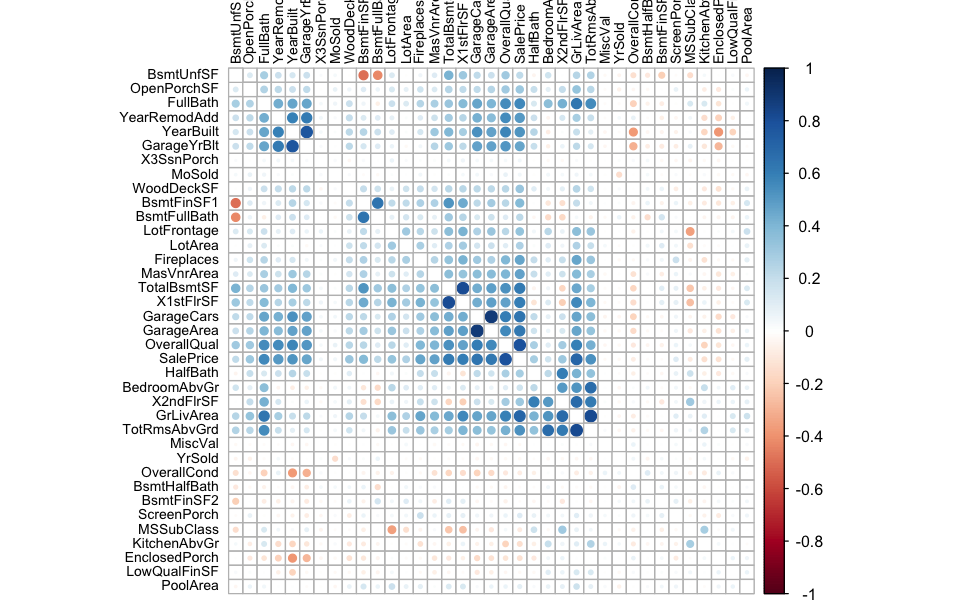

In [19]:
numeric_cols <- names(which(sapply(df, is.numeric)))
cat('There are', length(numeric_cols), 'numeric variables')

corr_matrix <- cor(df[numeric_cols])
corrplot.mixed(corr_matrix, lower="circle", upper="circle", tl.pos="lt", tl.col="black", tl.cex = 0.7,
               diag="n", order="hclust", hclust.method="complete")

Pueden observarse varias cosas en la imagen anterior. En primer lugar, parece que existen una serie de variables predictoras que no presentan ninguna correlación con nuestra variable objetivo, SalePrice. Sin embargo hemos de recordar que esta función se centra en calcular la correlación de Pearson, es decir, correlaciones lineales, con lo que no es tan claro que podamos prescindir de dichas variables como si nada.

Por otro lado, tambien encontramos algunas variables que presentan una fuerte dependencia entre sí, es el caso del par GarageArea - GarageCars por ejemplo. Esto tiene sentido, si nos vamos a la definición de cada una de las variables, vemos que:

    - GarageCars: Size of garage in car capacity

    - GarageArea: Size of garage in square feet

Al final ambas están midiendo el tamaño del garaje, ya sea de una forma o de otra, con lo que tiene sentido lo obtenido.
Llegado el momento, en función del modelo por el que nos decantemos, quizá si sea interesante eliminar alguna de ellas con el fin de no introducir información redundante al modelo. Como sabemos, algunos algoritmos como podría ser Naive Bayes por ejemplo, son mucho más sensibles a este tipo de problematicas de lo que quizá podrían serlos otros como los ensambles de árboles de decisión, RandomForest por ejemplo.

A modo de detalle, vamos a hacer un plot mas pequeño con las correlaciones mas fuertes entre la variable objetivo SalePrice y el resto de predictores, pudiendo así los valores en mayor detalle.

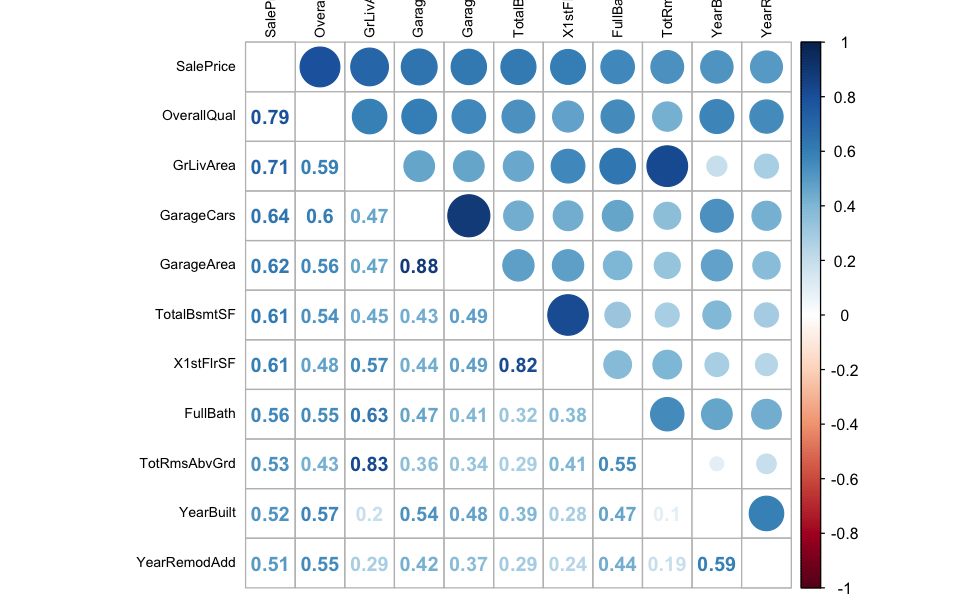

In [20]:
cor_sorted <- as.matrix(sort(corr_matrix[,'SalePrice'], decreasing = TRUE))
cor_high <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))

                              
cor_high <- corr_matrix[cor_high, cor_high]
corrplot.mixed(cor_high, tl.col="black", tl.pos = "lt", tl.cex = 0.7)

## 2.4. Exploratory data analysis and outlier detection

<a id='eda'></a>

Veamos un analisis mas detallado paras las variables contenidas en la matriz de correlación anterior

### OverallQuality: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

La variable OverallQual es numérica, sin embargo esta discretizada de forma que solo puede tomar valores contenidos entre 0 y 10. En principio, deberíamos obtener que si el acabado final de la casa posee una mayor puntuación, también debería poseer un precio mayor. Representemos un boxplot para apreciarlo:

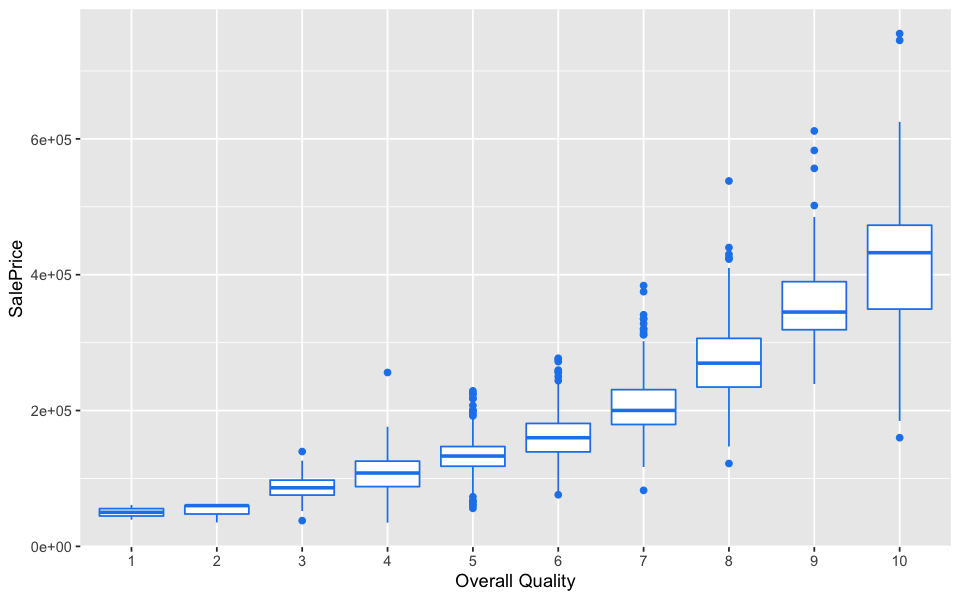

In [21]:
ggplot(data=df, aes(x=factor(OverallQual), y=SalePrice)) + 
    geom_boxplot(col='dodgerblue2')+labs(x='Overall Quality')

### GrLivArea: Above grade (ground) living area square feet

A diferencia de la variable OverallQuality, GrLivArea es numérica y además continua. Por lo tanto la representación ideal será realizar un scatterplot y tratar de enfrentarla con SalePrice.

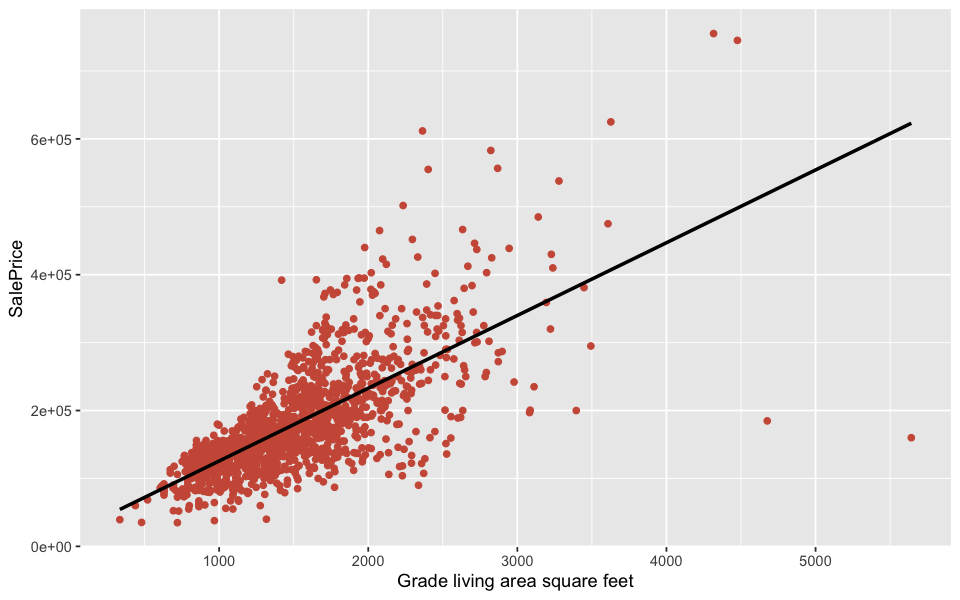

In [22]:
ggplot(data=df, aes(x=GrLivArea, y=SalePrice)) + geom_point(col='coral3') + 
    geom_smooth(method = "lm", se=FALSE, color="black")+labs(x='Grade living area square feet')

Aquí nos encontramos las dos primeras casas con areas realmente grandes y precios relativamente bajos, aparentemente parecen outliers. Evidentemente por esta única variable no podremos descartar dichos registros, ya que si las casas poseen grandes dimensiones pero su estado es pésimo, podria explicarse el bajo coste que tienen.

In [23]:
df %>% filter(GrLivArea > 4500) %>% select('SalePrice', 'GrLivArea', 'OverallQual', 'GarageArea')

SalePrice,GrLivArea,OverallQual,GarageArea
184750,4676,10,884
160000,5642,10,1418


Ahora si, podemos ver que las casas son muy grandes, poseen grandes garages y están en un estado formidable. Por lo tanto, estos dos registros son outliers.

### GarageCars: Size of garage in car capacity

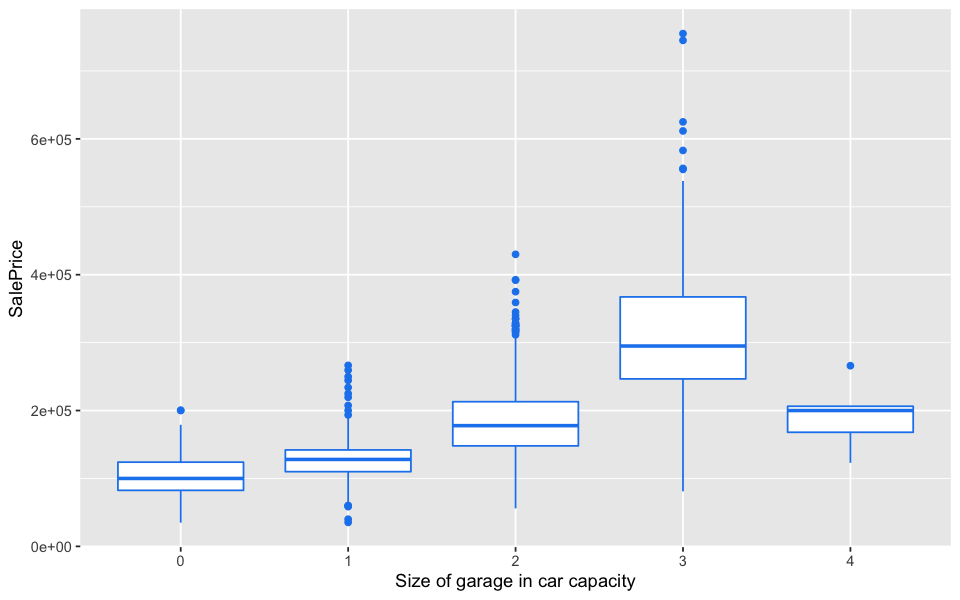

In [24]:
ggplot(data=df, aes(x=factor(GarageCars), y=SalePrice)) + 
    geom_boxplot(col='dodgerblue2')+labs(x='Size of garage in car capacity')

### GarageArea: Size of garage in square feet

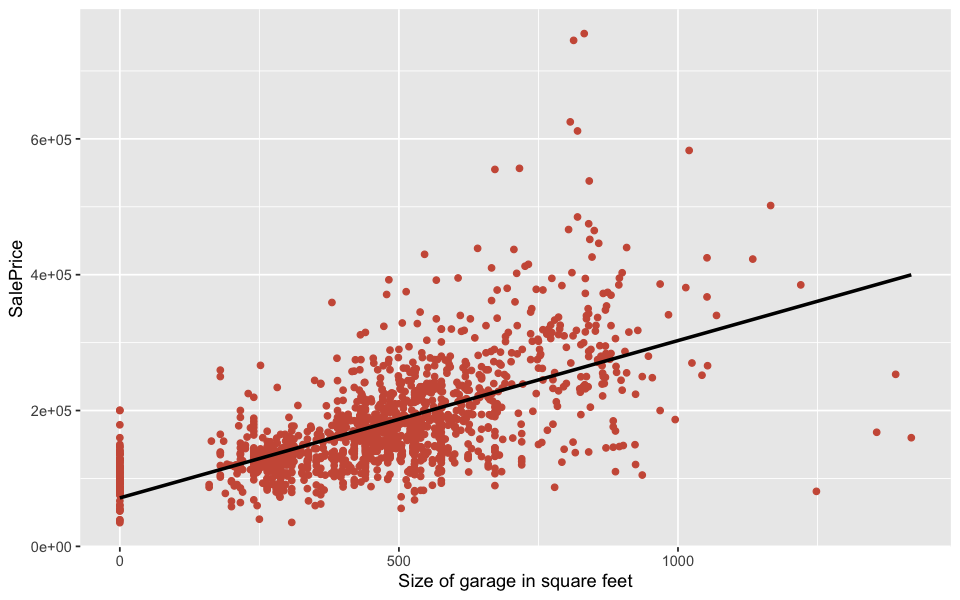

In [25]:
ggplot(data=df, aes(x=GarageArea, y=SalePrice)) + geom_point(col='coral3') + 
    geom_smooth(method = "lm", se=FALSE, color="black")+labs(x='Size of garage in square feet')

Segun podemos apreciar en esta figura, existen una serie de registros para los cuales el area es identicamente nulo y el precio de la vivienda oscila entre 0 y 200000. Esto corresponde a viviendas que no poseen garaje.

### TotalBsmtSF: Total square feet of basement area

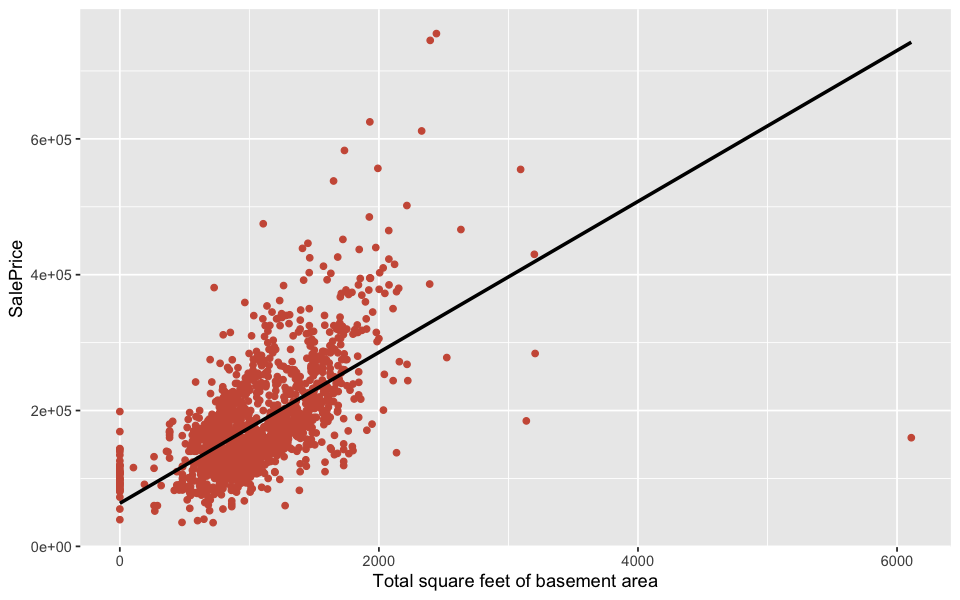

In [26]:
ggplot(data=df, aes(x=TotalBsmtSF, y=SalePrice)) + geom_point(col='coral3') + 
    geom_smooth(method = "lm", se=FALSE, color="black")+labs(x='Total square feet of basement area')

Seguimos pudiendo apreciar esa tendencia positiva que corrobora que a mayor tamaño del sotano, mayor será el precio de la vivienda. Nuevamente observando que hay viviendas que no poseen sótano, y que hay algunas otras que se salen bastante de la tendencia. El ejemplo mas claro aquel registro que tinene un tamaño del sotano mayor a 6000 pies, y la casa vale aproximadamente igual que la media.

In [27]:
df %>% filter(TotalBsmtSF > 6000)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,Gd,None,None,0,1,2008,New,Partial,160000


### 1stFlrSF: First Floor square feet

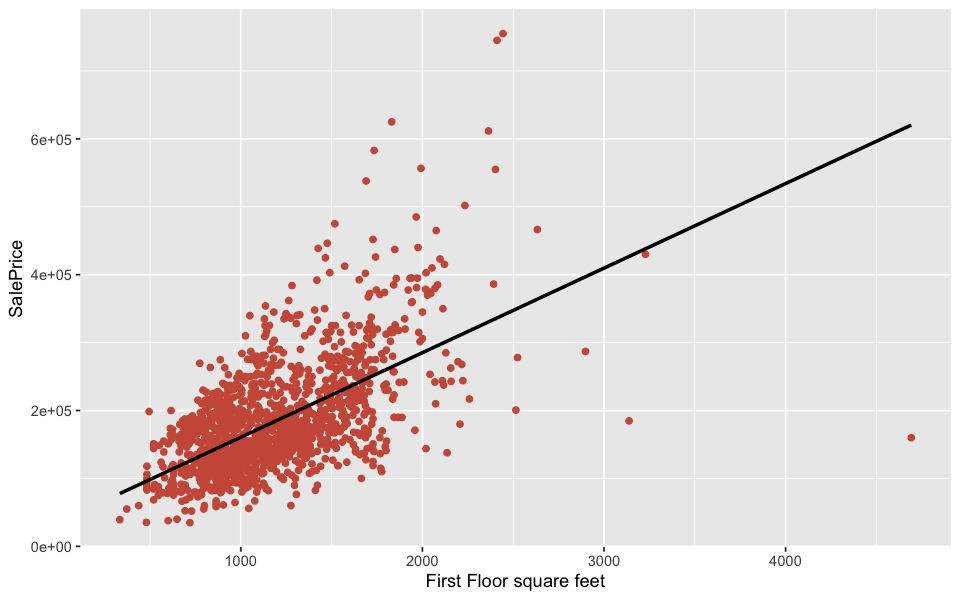

In [28]:
ggplot(data=df, aes(x=X1stFlrSF, y=SalePrice)) + geom_point(col='coral3') + 
    geom_smooth(method = "lm", se=FALSE, color="black")+labs(x='First Floor square feet')

In [29]:
df %>% filter(X1stFlrSF > 4500)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,Gd,None,None,0,1,2008,New,Partial,160000


Nuevamente nos encontramos con el mismo registro que antes. Se escapa muy fuertemente de la normal. Corroboramos que estamos tratando con un outlier.

### FullBath: Full bathrooms above grade

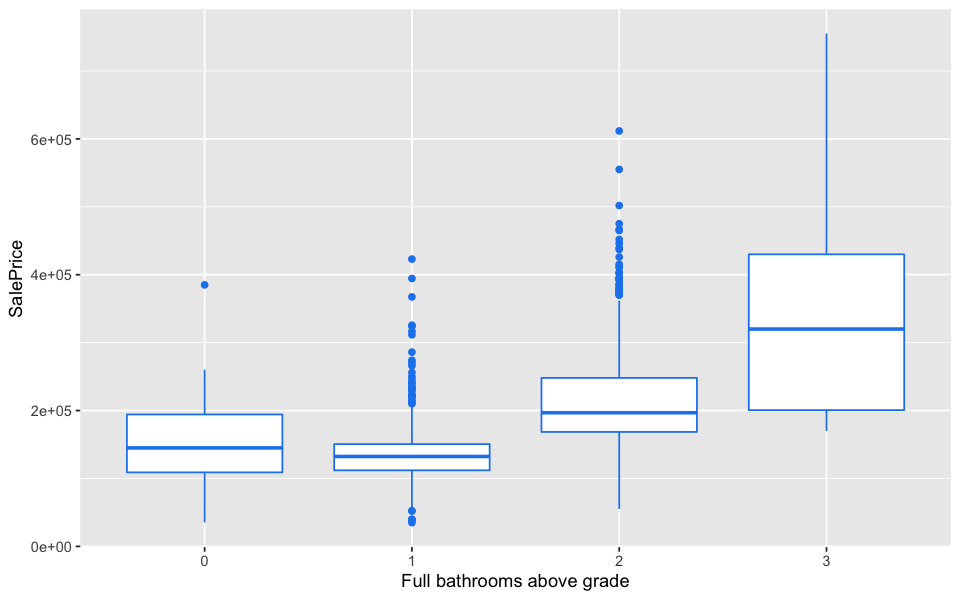

In [30]:
ggplot(data=df, aes(x=factor(FullBath), y=SalePrice)) + 
    geom_boxplot(col='dodgerblue2')+labs(x='Full bathrooms above grade')

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

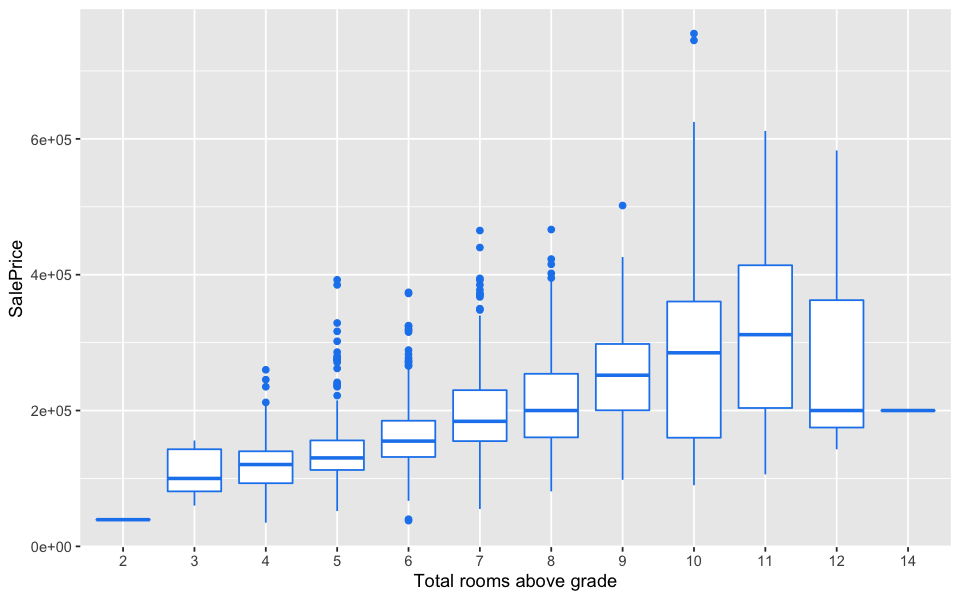

In [31]:
ggplot(data=df, aes(x=factor(TotRmsAbvGrd), y=SalePrice)) + 
    geom_boxplot(col='dodgerblue2')+labs(x='Total rooms above grade')

### YearBuilt: Original construction date

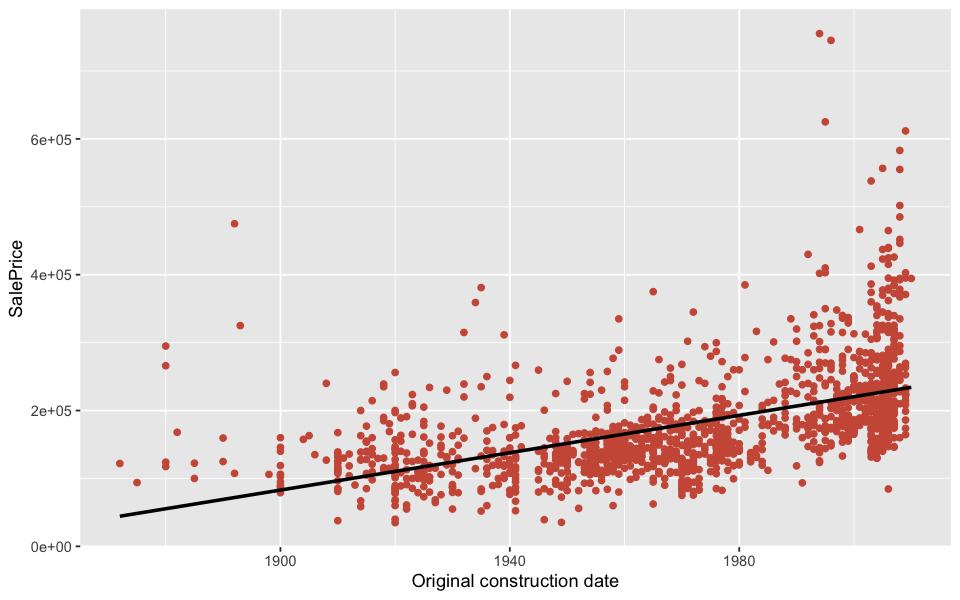

In [32]:
ggplot(data=df, aes(x=YearBuilt, y=SalePrice)) + geom_point(col='coral3') + 
    geom_smooth(method = "lm", se=FALSE, color="black")+labs(x='Original construction date')

A pesar de que la fecha de construccion podria entenderse como una variable numérica discreta, se ha representado como si lo fuese continua para poder apreciar la tendencia facilmente

### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

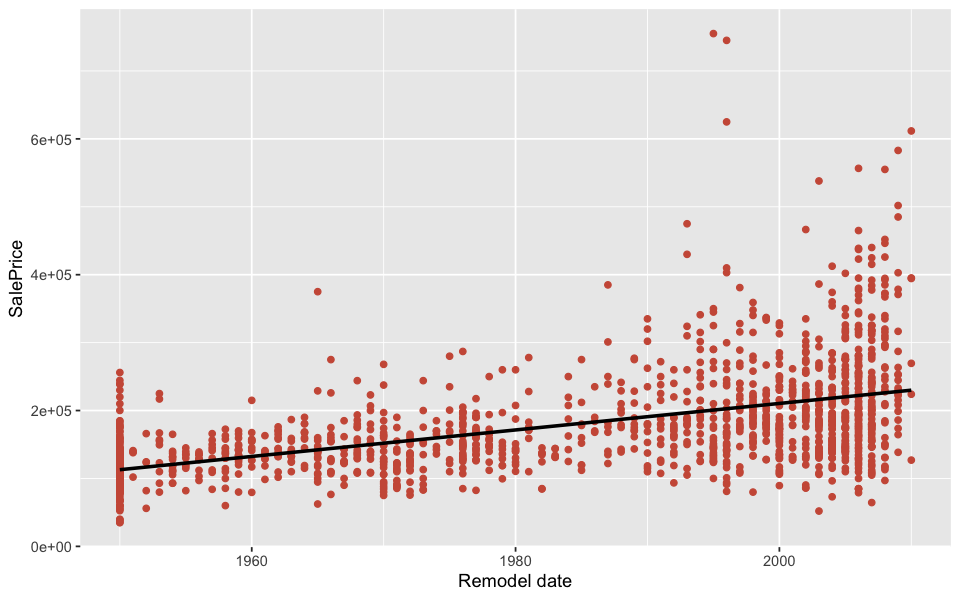

In [33]:
ggplot(data=df, aes(x=YearRemodAdd, y=SalePrice)) + geom_point(col='coral3') + 
    geom_smooth(method = "lm", se=FALSE, color="black")+labs(x='Remodel date')

### SalePrice

Una vez hecho el analisis exploratorio sobre las variables predictoras, veamos como esta distribuida la variable objetivo

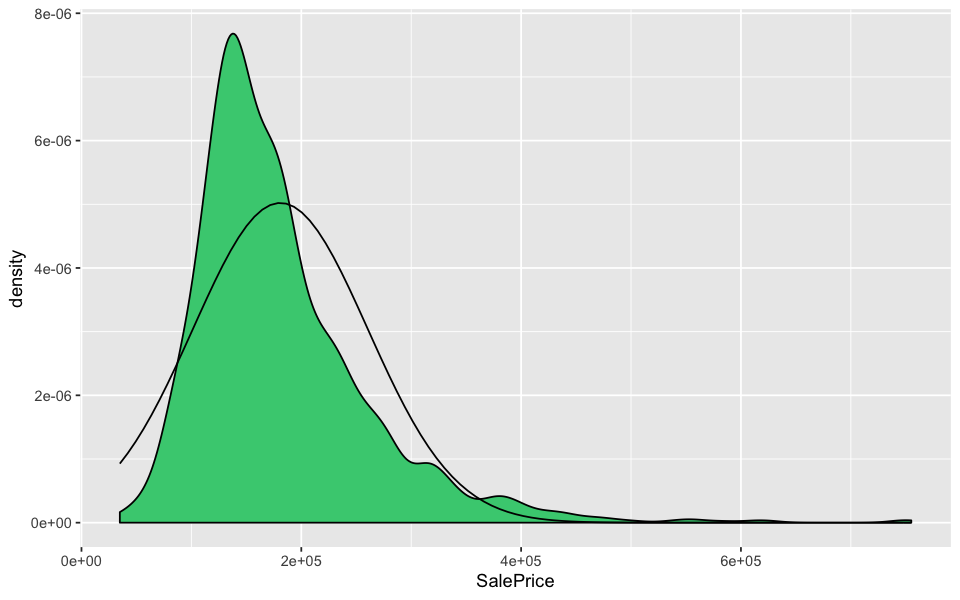

In [34]:
ggplot(data=df[!is.na(df$SalePrice),], aes(x=SalePrice)) + geom_density(fill="seagreen3") +
stat_function(fun = dnorm, args = list(mean = mean(df$SalePrice), sd = sd(df$SalePrice)))

La distribucion de los precios de las casas están sesgados(rigth skewed). La mayoria de las personas podran comprarse una casa asequible en precio, y pocas podrán comprar casas super lujosas y caras.

¿Que ocurre si aplicamos la función logaritmica a los datos?

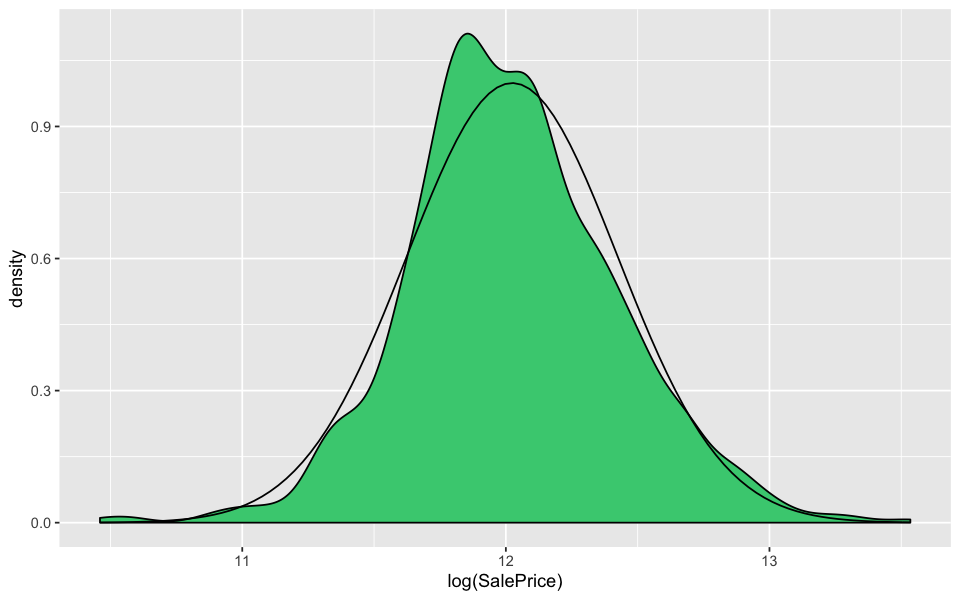

In [35]:
ggplot(data=df[!is.na(df$SalePrice),], aes(x=log(SalePrice))) + geom_density(fill="seagreen3") +
stat_function(fun = dnorm, args = list(mean = mean(log(df$SalePrice)), sd = sd(log(df$SalePrice))))

Efectivamente, la variable adquiere una normalidad muchisimo más clara a la que poseia al principio. Esto muy probablemente pueda ayudarnos a la hora de realizar nuestros modelos.

Lo último que nos queda por hacer en la sección, es eliminar los outliers que hemos detectado en este análisis y las variables que estaban altamente correlacionadas entre sí:

    - GarageArea - GarageCars
    - GarageYrBlt - YearBuild
    - TotalBsmtSF - X1stFlrSF
    - TotRmsAbvGrd - GrLivArea
    - YearRemodAdd - YearBuild
    - GarageCond - GarageQual
    - BsmtFinSF1 - BstmFullBath
    

In [36]:
#drop instances
df <- df[c(-524,-1299),]

#drop columns
correlated <- c('GarageArea', 'GarageYrBlt', 'TotalBsmtSF', 'TotalRmsAbvGrd', 
                'YearRemodAdd', 'GarageCond', 'BsmtFinSF1')
df <- df[,!(names(df) %in% correlated)]
submit <- submit[,!(names(df) %in% correlated)]

# 3. Data transformation

<a id='data_transformation'></a>

Entramos en la fase de transformación de variables. Para llevar a cabo esto, R-caret posee funciones tal como "preProcess(..., method = c("center", "scale"))" que nos permitirían escalar los datos, centrarlos y una serie de cosas más. Sin embargo, por dejar mas claros cuales son los pasos que se van a seguir, se van a explicar uno a uno, y se recurrira a otra función llamada "recipe" que nos permite organizar un pipeline con las diferentes transformaciones que queremos aplicar a nuestros datos. Veamoslo en detalle

## 3.1. Encoding

<a id='encoding'></a>

Uno de las transformaciones que aplicaremos será realizar un encoding sobre las variables categóricas, ya que los algoritmo de machine learning generalmente no pueden trabajar con este tipo de variables. La idea de esta técnica se basa en, dada una variable predictora que puede tomar n valores discretos distintos, generaremos a partir de ella un vector de n dimensiones, cada una de ellas correspondiente a los posibles valores. De forma que si para una instancia, esta variable predictora tomaba un valor i contenido en n, entonces el vector estará completamente relleno de ceros, excepto en la posición de la columna i que poseera un 1.

Para su implementación recurriremos a la función "step_dummy", creando un conjundo de variables binarias dummy a partir de las variables denotadas como factores. Por tanto, la aplicaremos sobre todas la variables que no sean numéricas.

## 3.2. Skew and normalization

<a id='normalization'></a>

El tema de la simetría y sobre todo de la normalización es una de las cosas más importantes a la hora de transformar las variables. Como bien sabemos, muchos de los modelos se basan en la medida de distancias entre instancias, por tanto, será necesario que las variables esten comprendidas en rangos similares. Para ello recurriremos a 3 funciones y las explicaremos posteriormente: step_BoxCox, step_center y step_scale.

    - Symmetrization: La transformación Box-Cox, que requiere una variable estrictamente positiva, se puede usar para reescalar una variable para que sea más similar a una distribución normal.
    
    - Centering: Para llevar a cabo el proceso de centrado, esta funcion calculará el promedio de cada una de las variables y se lo restará a los datos. Es importante destacar que la función estima las medias de las variables a partir de los datos de entrenamiento y luego aplica el centrado sobre el conjunto de entrenamiento y test con esa media.
    
    - Scaling: Entendemos el escalado de datos como el proceso por el cual dividimos cada dato de las diferentes variables entre la desviación estandar de dicha variable. Al igual que antes, este proceso del cálculo de la desviación estandar se lleva a cabo sobre el conjunto de entrenamiento y se aplica tanto al de entrenamiento como al de test. 

Nótese que a pesar de haber dicho que algunos algoritmos se basan en distancias, en sentido estricto hemos obtado por realizar una estandarización en lugar de una normalización(limiar el rango entre 0 y 1). Esto tiene su explicación, y es que al final estamos ante un problema de aprendizaje supervisado de regresión, por lo que podemos ser algo mas laxos con estas distancias. Si por ejemplo estuvieramos ante un problema de aprendizaje no supervisado y tuvieramos que recurrir a algoritmos como k-means, entonces si nos preocupariamos mucho mas de que todas las variables estuvieran medidas sobre el mismo rango, pero no es el caso.

## 3.3. Correlations

<a id='correl'></a>

Como ya se comento al principio de la práctica, las correlaciones entre las variables predictoras pueden traer consecuencias negativas. Incluiremos en nuestro pipeline a la función "step_corr" para potencialmente eliminará  variables que tengan correlaciones grandes(en valor absoluto) con otras variables.

Adicionalmente, cuando una columna tiene un único valor, esa columna se excluye del análisis de correlación. 

## 3.4. Logaritmic transformation

<a id='logaritmic'></a>

En el análisis exploratorio del punto 2.4, hemos hablado y visualizado de como la variable objetivo SalePrice adquiere una forma bastante mas parecida a una disribución normal cuando aplicamos transformación logarítmica sobre ella. 

Por suerte, R también cuenta con una función que nos permitirá incluirla en nuestro pipeline de tranformaciónes, esta es "step_log"

## 3.5. Additional transformations

<a id='additional'></a>

Adicionalmente, como a fin de cuentas esta práctica podía tomarse como un tutorial, vamos a añadir otras dos funciones que a pesar de que a nuestro conjunto de datos ya no le aplican, si podrían ser de mucha utilidad en otras ocasiones. Estas dos son step_zv y check_missing. Veamoslas en detalle:

    - Zero variance: Esta función es muy util debido a que eliminará todas las columnas cuya varianza sea cero, es decir, que contengan un único valor en la columna. Al fin y al cabo, esto no debería incluirnos sobre nuestro modelo a la hora de entrenarlo.
    
    - Missing: Como su nombre indica, esta función nos permite checkear si la columna contiene valores missing para incluirla o no en cuenta en nuestro modelo

Una vez vistas todas las transformaciones que vamos a hacer, apliquemoslas sobre nuestro conjunto de datos. Como antes hemos dicho, estas transformaciones han de hacerse tanto sobre los datos etiquetados (df) como sobre el conjunto que posteriormente queremos hacer predicciones (submit). 

In [37]:
df_ <- df
submit_ <- submit

recipe_transformer <- recipe(SalePrice ~ ., data = df_) %>% 
  step_dummy(all_predictors(), -all_numeric()) %>%
  step_BoxCox(all_predictors()) %>%
  step_center(all_predictors())  %>%
  step_scale(all_predictors()) %>%
  step_zv(all_predictors()) %>%
  step_corr(all_predictors(), threshold = .9) %>%
  step_log(all_outcomes()) %>%
  check_missing(all_predictors())

recipe_transformer

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         73

Operations:

Dummy variables from all_predictors, -, all_numeric()
Box-Cox transformation on all_predictors
Centering for all_predictors
Scaling for all_predictors
Zero variance filter on all_predictors
Correlation filter on all_predictors
Log transformation on all_outcomes
Check missing values for all_predictors

In [38]:
df_prep <- prep(recipe_transformer, training = df_)
df <- bake(df_prep, new_data = df_)
submit <- bake(df_prep, new_data = submit_)

Veamos que pinta tienen los dataframes obtenidos tras la transformación:

In [39]:
head(df)

MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF2,BsmtUnfSF,X1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_CWD,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0.4956102,-0.146123835,-0.13992617,0.67120394,-0.4800869,1.0525983,0.5237568,-0.2887682,-0.94347160,-0.8057689,...,-0.05864125,-0.05864125,-0.05243229,-0.04539209,0.3881319,-0.05243229,-0.09106626,-0.1178926,0.4657033,-0.3034331
-1.1639153,0.564712264,0.10863080,-0.04266172,2.0230484,0.1583736,-0.5705436,-0.2887682,-0.64036397,0.4290493,...,-0.05864125,-0.05864125,-0.05243229,-0.04539209,0.3881319,-0.05243229,-0.09106626,-0.1178926,0.4657033,-0.3034331
0.4956102,0.002048953,0.41939479,0.67120394,-0.4800869,0.9863594,0.3339292,-0.2887682,-0.30106439,-0.5761617,...,-0.05864125,-0.05864125,-0.05243229,-0.04539209,0.3881319,-0.05243229,-0.09106626,-0.1178926,0.4657033,-0.3034331
0.6989915,-0.400790268,0.09843318,0.67120394,-0.4800869,-1.8619118,-0.5705436,-0.2887682,-0.06129268,-0.4373729,...,-0.05864125,-0.05864125,-0.05243229,-0.04539209,0.3881319,-0.05243229,-0.09106626,-0.1178926,-2.1458173,-0.3034331
0.4956102,0.742870252,0.88769244,1.36272655,-0.4800869,0.9532400,1.3835643,-0.2887682,-0.17439254,0.1198615,...,-0.05864125,-0.05864125,-0.05243229,-0.04539209,0.3881319,-0.05243229,-0.09106626,-0.1178926,0.4657033,-0.3034331
0.2463014,0.786751454,0.86741209,-0.78354645,-0.4800869,0.7214039,-0.5705436,-0.2887682,-1.13800337,-1.0372976,...,-0.05864125,-0.05864125,-0.05243229,-0.04539209,0.3881319,-0.05243229,-0.09106626,-0.1178926,0.4657033,-0.3034331


Si vamos a las últimas cinco últimas columnas de este nuevo dataframe, podemos comprobar que efectivamente las variables categóricas se han repartido en n columnas cada una, donde n es el número de factores diferentes que tenia la variable, en este caso se han creado: SaleCondition_AdjLand, SaleCondition_Alloca, SaleCondition_Family, SaleCondition_Normal y SaleCondition_Partial.

Pero no solo eso, si no que tambien podríamos verificar si existen valores missing(no lo hay) o checkear si efectivamente las columnas se han estandarizado y poseen media próxima a cero y desviación típica igual a 1.

In [40]:
cat('Average of a column of dataset: ', mean(df$MSSubClass))
cat('\nStandard deviation of a column of dataset: ', sd(df$LotFrontage))
cat('\nVariance of a column of dataset: ', var(df$SaleCondition_Family))

Average of a column of dataset:  -4.325697e-16
Standard deviation of a column of dataset:  1
Variance of a column of dataset:  1

Parece que tenemos preparado el dataset. Pasemos a implementar diferentes modelos y veamos cual es el que se comporta mejor.

# 4. Data Mining/ Modelling

<a id='modelling'></a>

Funcion para plotear los hiperparametros

In [41]:
tuneplot <- function(x, probs = .90) {
  ggplot(x) + coord_cartesian(ylim = c(quantile(x$results$RMSE, probs = probs), min(x$results$RMSE))) + theme_bw()
}

## 4.1. Lasso-Ridge regression model

<a id='lasso'></a>

Dado el problema con que estamos tratando, una buena opción será probar algun tipo de modelo regresivo. Generalmente en problemas de regresión podemos aplicar simplemente una regresión lineal o algun tipo de modelo mixto que trate de explicar el comportamiento de la variable objetivo añadiendo algunos factores aleatorios. 

En nuestro caso, vamos a probar un par de modelos que generaliza la regresión lineal con el fin de reducir la complejidad del modelo, mejorando los errores de predicción para reducir el sobreajuste (overfitting). Estamos hablando de Lasso y Ridge regression. La diferencia principal entre uno y otro es que Ridge regression aproxima a cero los coeficientes de los predictores(tienden a minimizar la influencia de los predictores menos importantes) pero sin llegar a excluir ninguno, mientras que Lasso aproxima a cero los coeficientes, llegando a excluir predictores.

El parametro por el cual podemos regular si aplicamos Lasso o Ridge es mediante $\alpha$. Cuando el valor de $\alpha$ es igual a 1, nos encontramos con el modelo Lasso, mientras que cuando $\alpha$ es igual a 0 tenemos Ridge. Cualquier $\alpha$ entre 0 y 1 será una combinación de ambos. A priori parece que Lasso debería funcionarnos mejor. El hecho de contar con mas de 200 variables puede ser un problema que la selección que hace Lasso puede venirnos muy bien. Veamos que ocurre.


Para su implementaión, vamos a realizar un proceso de cross validation con 10 folds, en el que vamos a ir iterando sobre diferentes valores de $\lambda$ (el otro de los hiperparámetros del modelo) para tratar de hayar un mejor ajuste, concretamente probaremos 1000 valores de $\lambda$ diferentes y 4 $\alpha$ diferentes.

In [42]:
cross_validation <-trainControl(method="cv", number=10)
grid_parameters <- expand.grid(alpha = c(0, 0.3, 0.7, 1), lambda = seq(0.0001, 0.01,by = 0.0001))

Entrenemos:

In [43]:
regression_model <- suppressWarnings(train(
                                           x=select(df, -SalePrice), 
                                           y=df$SalePrice, 
                                           method='glmnet', 
                                           trControl= cross_validation, 
                                           tuneGrid=grid_parameters)
                                    )

Veamos cual es el mejor valor para el parametro $\lambda$ y que error cuadratico medio(la raíz) hemos obtenido:

In [44]:
regression_model$bestTune
cat('\nBest RMSE: ', min(regression_model$results$RMSE))

,alpha,lambda
166,0.3,0.0066



Best RMSE:  0.1156982

Por lo visto, el mejor algoritmo no ha sido una regresión Lasso pura. Veamos los resultados gráficamente:

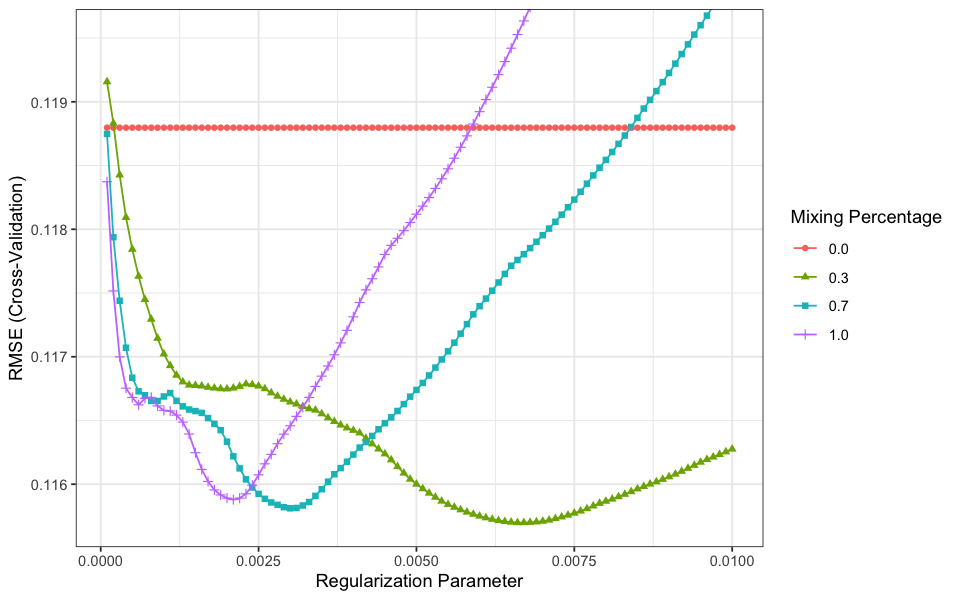

In [45]:
tuneplot(regression_model)

Este tipo de representaciones son muy útiles, sobre todo si imponemos un rango amplio de hiperparametros. La funcion de pérdida RMSE posee varios intervalos concavos, con lo que si no la representaramos gráficamente, podríamos caer erroneamente en la cuenta de que alguno de esos valles era el mínimo absoluto de la función, cuando en realidad solo son mínimos relativos.

Al no ser el mejor modelo una regresion Ridge pura, se ha tenido que hacer una selección de variables. Veamos cuales son los predictores que el algoritmo ha considerado como los más importantes.

In [46]:
var_impo_reg <- varImp(regression_model, scale=F)
var_impo_reg

cat('Regression model used', length(which(var_impo_reg$importance$Overall!=0)), 'variables to create the model')

glmnet variable importance

  only 20 most important variables shown (out of 233)

                      Overall
GrLivArea             0.09259
OverallQual           0.07510
YearBuilt             0.05910
X1stFlrSF             0.05800
OverallCond           0.04668
LotArea               0.03960
GarageCars            0.03354
SaleCondition_Partial 0.02845
X2ndFlrSF             0.02638
KitchenQual_TA        0.02395
BsmtFullBath          0.02258
Neighborhood_Crawfor  0.02032
KitchenQual_Gd        0.01979
SaleCondition_Normal  0.01910
BsmtExposure_Gd       0.01860
Neighborhood_NridgHt  0.01800
BsmtFinType1_Unf      0.01631
Condition1_Norm       0.01631
Neighborhood_StoneBr  0.01624
Functional_Typ        0.01439

Regression model used 141 variables to create the model

Como hemos dicho, este modelo nos realiza una selección de varibles. Concretamente usó 141 de las más de 250 con que contamos.

Una vez entendido que está haciendo nuestro modelo y como funciona, vayamos a realizar predicciones sobre el conjunto de submit. Para ello llamaremos a la función predict, recordando que anteriormente aplicamos una transformación logarítmica a la variable SalePrice, por lo que ahora deberemos deshacer la transformación aplicando la exponencial de los valores obtenidos.

In [50]:
predictions_regressions <- predict(regression_model, submit)
predictions_regressions <- exp(predictions_regressions)

Echemos un vistazo a los resultados obtenidos:

In [51]:
regression_sumbit <- data.frame(Id = submit_labels, SalePrice = predictions_regressions)
head(regression_sumbit)

Id,SalePrice
1461,114850.3
1462,159293.2
1463,180277.7
1464,201437.5
1465,203284.4
1466,171282.1


Parece que, al menos, el orden de magnitud es bastante razonable, eso ya es buena señal. Para comprobar si nuestro modelo es realmente bueno, iremos a Kaggle y evaluaremos los resultados obtenidos.

In [52]:
write.csv(regression_sumbit, 
          file = paste0("./Output/regression_submit_", format(Sys.Date(), "%d_%m_%Y"), ".csv"), row.names = F)

## 4.2. Extreme Gradient Boosting model

<a id='xgb'></a>

Otro de los modelos por excelencia en el aprendizaje supervisado son los árboles de decisión, concretamente usaremos un ensemble denominado Extreme Gradient Boosting. 

Por ponernos un poco en contexto, Gradient Boosting es una técnica de machine learning tanto para clasificación como para regresión que implementa un modelo en forma de ensemble de modelos predictivos débiles, tipicamente árboles de decisión. La particularidad de "Extreme" es que usa una regularización de modelos para controlar el overfitting, consiguiendo mejores resultados.



La problemática que se nos plantea al usar XGBoost es que los hiperparámetros que se pueden ajustar en el modelo son muchos: el learning rate $\eta$, el numero minimo de instancias para seguir generando un nodo hijo, la profundidad del árbol, número máximo de hojas, etc. Para tratar de fijar unos rangos razonables en nuestro grid, tal y como hicimos con el modelo Lasso, vamos a llevar a cabo una serie de visualizaciones muy útiles.

### Max_depth, eta, nrounds

En primer lugar, vamos a ver como se comporta la métrica de error en funcion de la profundidad de los árboles, el ratio de aprendizaje $\eta$ y el número máximo de iteraciones requeridas por el gradiente descendente para converger.

In [53]:
nrounds <- 1000

tune_grid <- expand.grid(
  nrounds = seq(from = 200, to = nrounds, by = 50),
  eta = c(0.025, 0.05, 0.1, 0.3),
  max_depth = c(2, 3, 4, 5, 6),
  gamma = 0,
  colsample_bytree = 1,
  min_child_weight = 1,
  subsample = 1
)

tune_control <- trainControl(method = "cv", number = 3, verboseIter = FALSE, allowParallel = TRUE)

xgb_model <- suppressWarnings(train(
    x = select(df, -SalePrice),
    y = df$SalePrice,
    trControl = tune_control,
    tuneGrid = tune_grid,
    method = "xgbTree",
    verbose = TRUE
))


tuneplot <- function(x, probs = .90) {
  ggplot(x) + coord_cartesian(ylim = c(quantile(x$results$RMSE, probs = probs), min(x$results$RMSE))) + theme_bw()
}

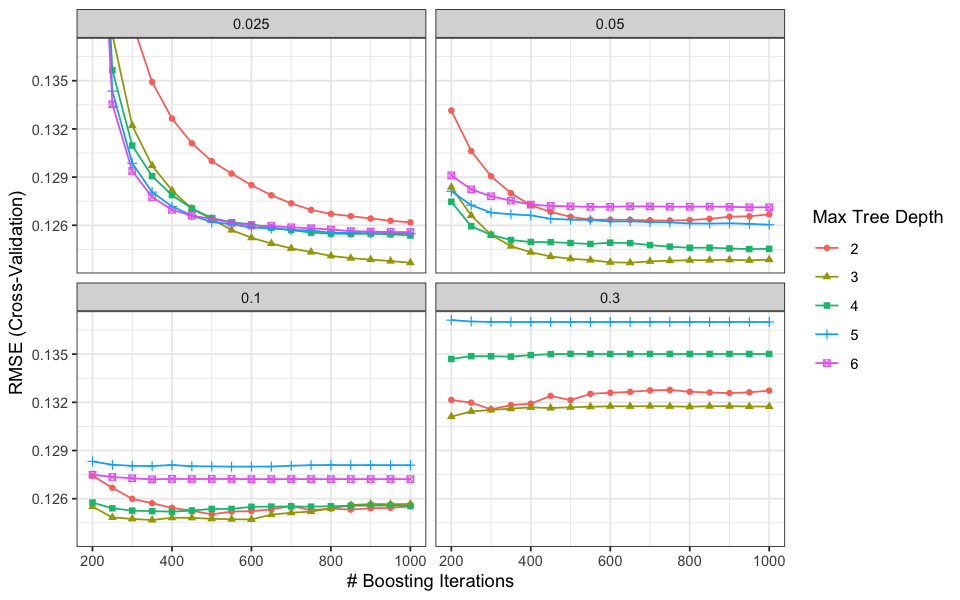

In [54]:
tuneplot(xgb_model)

Según podemos observar en las gráficas, parece que la profundidad máxima del árbol no aporta ninguna ventaja de cara al aprendizaje del modelo. Por otro lado, el numero de iteraciones que deben realizarse son de al menos 800 para estar en los margenes minimos de error que hemos cometido. Por ultimo, el valor de $\eta$ debe oscilar entre 0.1 y 0.05 para que el modelo aprenda correctamente.

Al igual que hemos hecho anteriormente, vamos a ver cuales eran los mejores hiperparámetros, el mejor RMSE encontrado, y las variables seleccionadas por el modelo para entrenar.

In [55]:
xgb_model$bestTune
cat('\nBest RMSE: ', min(xgb_model$results$RMSE))

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
34,1000,3,0.025,0,1,1,1



Best RMSE:  0.1236689

In [56]:
var_impo_xgb <- varImp(xgb_model, scale=F)
var_impo_xgb

cat('Lasso used', length(which(var_impo_xgb$importance$Overall!=0)), 'variables to create the model')

xgbTree variable importance

  only 20 most important variables shown (out of 233)

                       Overall
GrLivArea             0.208316
OverallQual           0.150958
X1stFlrSF             0.113789
YearBuilt             0.087777
GarageCars            0.071843
LotArea               0.048224
Fireplaces            0.047876
OverallCond           0.036688
GarageType_Attchd     0.020356
CentralAir_Y          0.013899
BsmtFullBath          0.013091
KitchenQual_TA        0.010737
BsmtExposure_Gd       0.010195
OpenPorchSF           0.008782
BsmtFinType1_GLQ      0.007873
WoodDeckSF            0.007809
BsmtFinType2_None     0.006755
BsmtUnfSF             0.006738
GarageQual_TA         0.006652
SaleCondition_Partial 0.006321

Lasso used 155 variables to create the model

In [57]:
predictions_xgb <- predict(xgb_model, submit)
predictions_xgb <- exp(predictions_xgb)

In [58]:
xgb_sumbit <- data.frame(Id = submit_labels, SalePrice = predictions_xgb)
head(xgb_sumbit)

Id,SalePrice
1461,119475.8
1462,154864.4
1463,181481.4
1464,191690.1
1465,190367.8
1466,173512.8


In [59]:
write.csv(xgb_sumbit, 
          file = paste0("./Output/xgb_sumbit_", format(Sys.Date(), "%d_%m_%Y"), ".csv"), row.names = F)

## 4.3. Gaussian Processes model


<a id='gauss'></a>

Los procesos gaussianos (GP) son un método genérico de aprendizaje supervisado diseñado para resolver problemas de regresión y clasificación probabilística con mucha versatilidad. 

Nos hemos decantado a probar esta técnica debido a que nuestras variables predictoras estan estanzarizadas, y podría ser una buena opcion. 

Sin embargo, estos procesos presentan varias desvantajas: No son escasos, es decir, utilizan toda la información de muestras/características para realizar la predicción. Además Pierden eficiencia en espacios de altas dimensiones, es decir, cuando el número de características excede algunas docenas(como es nuestro caso).

In [60]:
gaussian_grid <- expand.grid(sigma = seq(from = 0.00001, to = 0.0001, by = 0.00001)) 

tune_control_svm <- trainControl(method = "cv", number = 10, verboseIter = FALSE, allowParallel = TRUE)

gaussian_model <- suppressWarnings(train(
    x = select(df, -SalePrice),
    y = df$SalePrice,
    trControl = tune_control_svm,
    tuneGrid = gaussian_grid,
    method = "gaussprRadial",
    verbose = TRUE
))

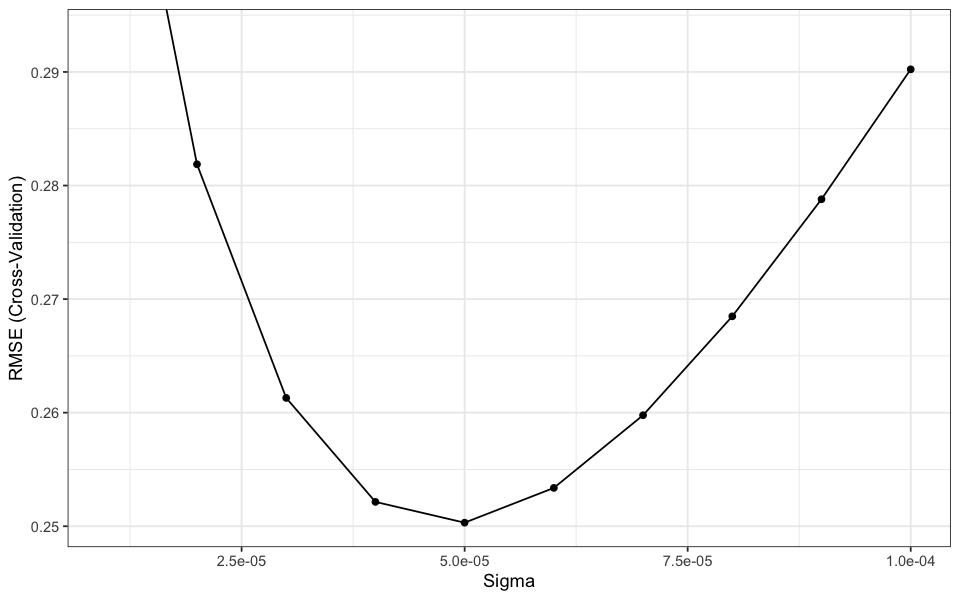

In [61]:
tuneplot(gaussian_model)

In [62]:
#best hiperparametros
gaussian_model$bestTune
cat('\nBest RMSE: ', min(gaussian_model$results$RMSE))

,sigma
5,5e-05



Best RMSE:  0.2503138

Hemos obtenido un RMSE de 0.25, valor que dista bastante de lo obtenido mediante los modelos regresivos que usamos en 4.1. Para tratar de mejorareste algoritmo, vamos a hacer nosotros mismos una selección de variables manual. Como hemos dicho, este modelo penaliza mucho el que existan muchas variables, con lo que hacer una reduccion en el conjunto de predictores podría ayudarnos. Para elegir los mejores predictores, nos basaremos en la selección de características que uso el modelo regresivo Lasso, el cual por el momento es el que mejores resultados ha obtenido.

In [63]:
gaussian_grid <- expand.grid(sigma = seq(from = 0.001, to = 0.1, by = 0.001)) 

tune_control_svm <- trainControl(method = "cv", number = 10, verboseIter = FALSE, allowParallel = TRUE)

gaussian_model <- suppressWarnings(train(
    x = df %>% select(c("GrLivArea","OverallQual", "YearBuilt", "X1stFlrSF", "OverallCond", "LotArea",
"GarageCars", "SaleCondition_Partial", "X2ndFlrSF", "BsmtFullBath")),
    y = df$SalePrice,
    trControl = tune_control_svm,
    tuneGrid = gaussian_grid,
    method = "gaussprRadial",
    verbose = TRUE
))

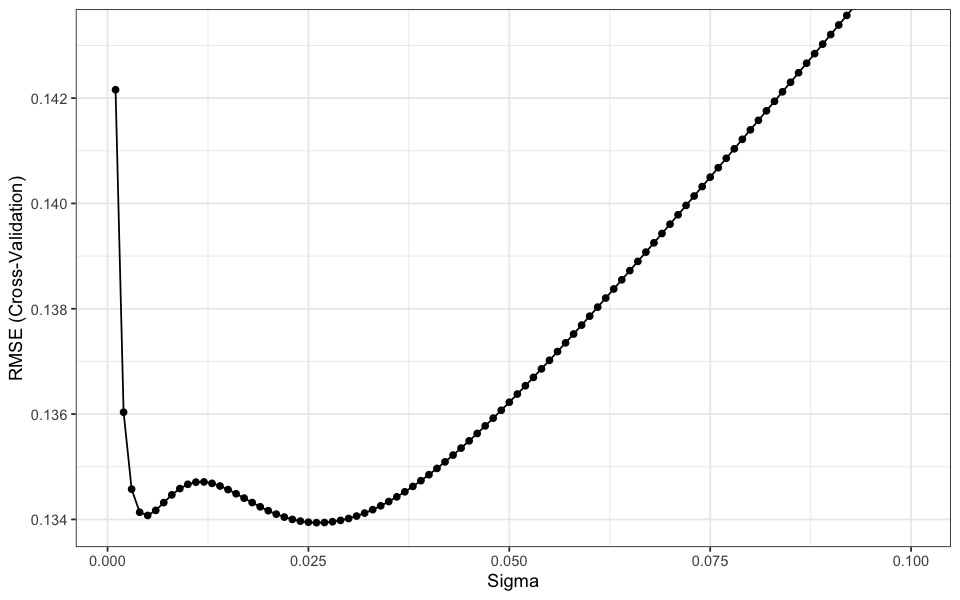

In [64]:
tuneplot(gaussian_model)

In [65]:
#best hiperparametros
gaussian_model$bestTune
cat('\nBest RMSE: ', min(gaussian_model$results$RMSE))

,sigma
26,0.026



Best RMSE:  0.1339383

Estos resultados son mucho mejores que los obtenidos anteriormente, como vemos, la selección de variables manual ha sido crucial a la hora de implementar este algoritmo.

In [69]:
predictions_gauss <- predict(gaussian_model, submit %>% select(c("GrLivArea", "OverallQual", "YearBuilt", "X1stFlrSF", "OverallCond", "LotArea",
"GarageCars", "SaleCondition_Partial", "X2ndFlrSF", "BsmtFullBath")))
predictions_gauss <- exp(predictions_gauss)

In [70]:
gaussian_sumbit <- data.frame(Id = submit_labels, SalePrice = predictions_gauss)
head(gaussian_sumbit)

Id,SalePrice
1461,117836.2
1462,153838.6
1463,165551.6
1464,184752.1
1465,183812.7
1466,170659.4


In [71]:
write.csv(gaussian_sumbit, 
          file = paste0("./Output/gaussian_sumbit_", format(Sys.Date(), "%d_%m_%Y"), ".csv"), row.names = F)

## 4.4. Support Vector Machine Regression model


<a id='svm'></a>

Generalmente las máquinas de soporte vectorial son usadas como clasificadores, ya que permiten seperar el espacio por medio de hiperplanos. Sin embargo, estos algoritmos también permiten ser aplicados en problemas de regresión.

Para aplicarlo utilizaremos un kernel Radial exponencial, donde los parametros a ajustar son C y sigma. Al igual que antes, crearemos una malla de hiperparámetros y trataremos de obtener los mejores resultados.

In [72]:
svm_grid <- expand.grid(sigma = seq(from = 0.000001, to = 0.1, by = 0.001), C = c(0.01, 0.1, .5, 1)) 

tune_control_svm <- trainControl(method = "cv", number = 3, verboseIter = FALSE, allowParallel = TRUE)

svm_model <- suppressWarnings(train(
    x = select(df, -SalePrice),
    y = df$SalePrice,
    trControl = tune_control_svm,
    tuneGrid = svm_grid,
    method = "svmRadial",
    verbose = TRUE
))

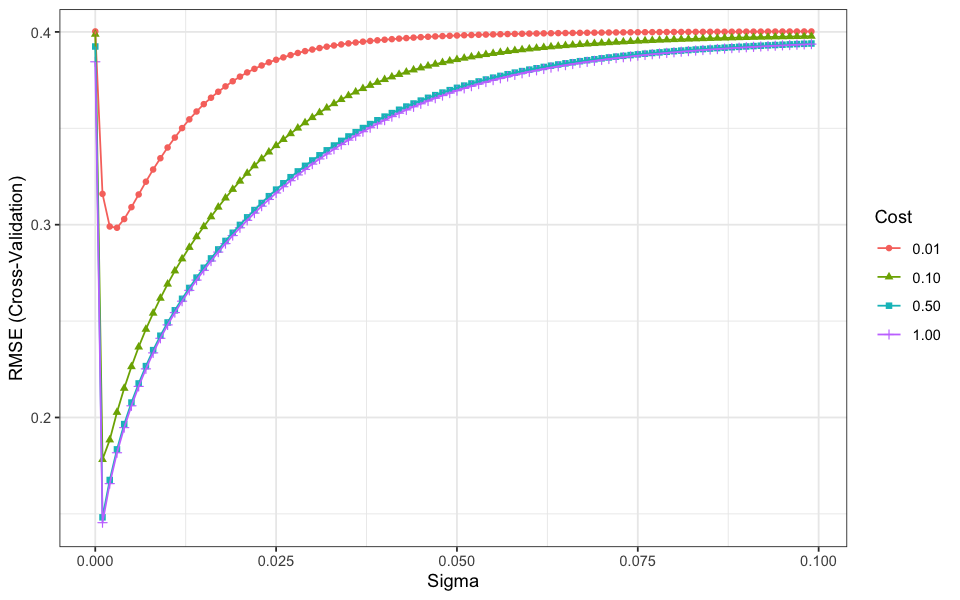

In [73]:
tuneplot(svm_model)

In [74]:
#best hiperparametros
svm_model$bestTune
cat('\nBest RMSE: ', min(svm_model$results$RMSE))

,sigma,C
8,0.001001,1



Best RMSE:  0.1454324

Al igual que ocurria con el algoritmo anterior, SVM no realiza ninguna purga de predictores, por lo que experimentaremos nosotros mismos que ocurre si hacemos una selección de las 10 mejores.

In [79]:
svm_grid <- expand.grid(sigma = seq(from = 0.001, to = 0.1, by = 0.001), C = c(0.1, .5, 1, 5, 10)) 

tune_control_svm <- trainControl(method = "cv", number = 3, verboseIter = FALSE, allowParallel = TRUE)

svm_model <- suppressWarnings(train(
    x = df %>% select(c("GrLivArea","OverallQual", "YearBuilt", "X1stFlrSF", "OverallCond", "LotArea",
"GarageCars", "SaleCondition_Partial", "KitchenQual_TA", "BsmtFullBath")),
    y = df$SalePrice,
    trControl = tune_control_svm,
    tuneGrid = svm_grid,
    method = "svmRadial",
    verbose = TRUE
))

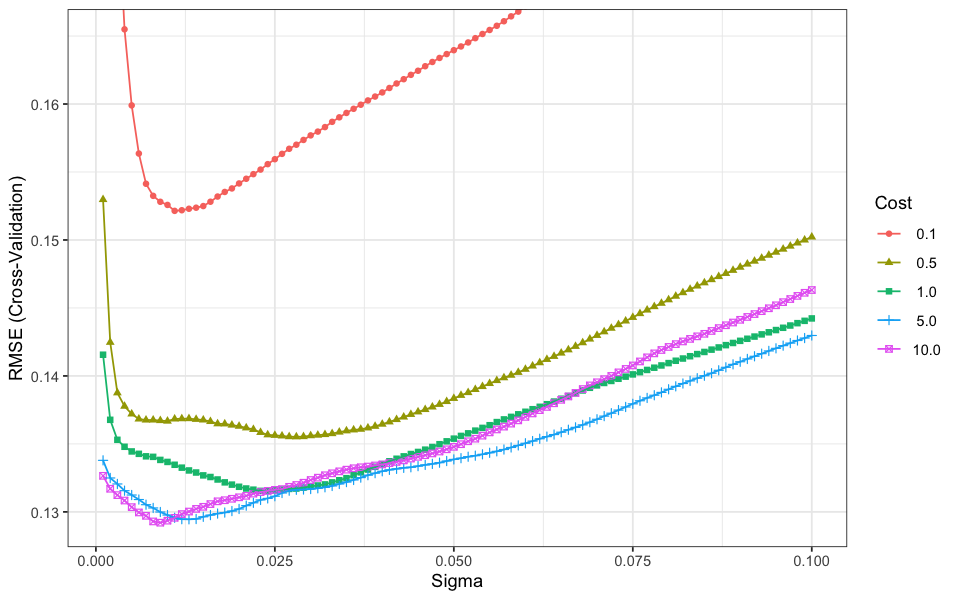

In [80]:
tuneplot(svm_model)

In [81]:
#predicciones
predictions_svm <- predict(svm_model, submit %>% select(c("GrLivArea","OverallQual", "YearBuilt", "X1stFlrSF", "OverallCond", "LotArea",
"GarageCars", "SaleCondition_Partial", "KitchenQual_TA", "BsmtFullBath")))
predictions_svm <- exp(predictions_svm)

In [83]:
#best hiperparametros
svm_model$bestTune
cat('\nBest RMSE: ', min(svm_model$results$RMSE))

,sigma,C
45,0.009,10



Best RMSE:  0.1292064

In [85]:
#save it
svm_sumbit <- data.frame(Id = submit_labels, SalePrice = predictions_svm)
head(svm_sumbit)


write.csv(svm_sumbit, 
          file = paste0("./Output/svm_sumbit_", format(Sys.Date(), "%d_%m_%Y"), ".csv"), row.names = F)

Id,SalePrice
1461,119475.8
1462,154864.4
1463,181481.4
1464,191690.1
1465,190367.8
1466,173512.8
